# 載入數據

In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
#讀取csv檔
train = pd.read_csv('winequality-white.csv')
# train.to_csv("1_save_test2.csv",index=True)
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


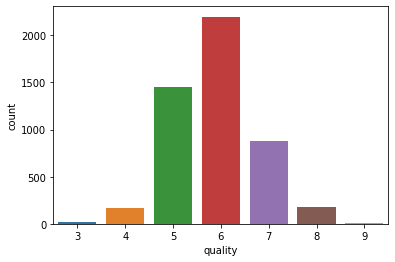

In [3]:
sns.countplot(x='quality',data=train)
#我們可以看到數據是非常極度不平衡，這會導致我們的預測不准

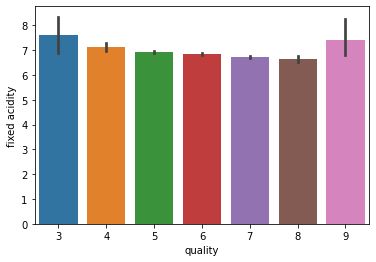

In [4]:
sns.barplot('quality', 'fixed acidity', data = train)
#看起來沒什麼相關性可言，雖然很像有向下的趨勢，可是最好品質的酒卻又有很高的固定酸度，看起來無法提供特徵

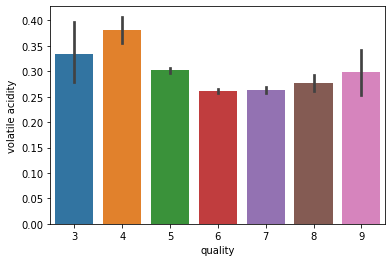

In [5]:
sns.barplot('quality', 'volatile acidity', data = train)
#無法提供特徵

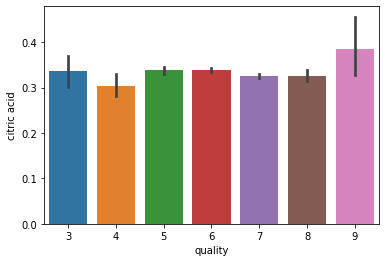

In [6]:
sns.barplot('quality', 'citric acid', data = train)
#無法提供特徵

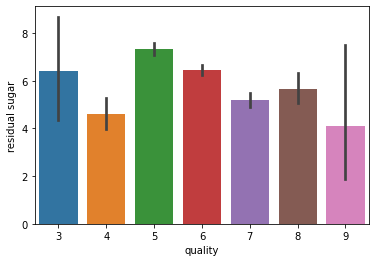

In [7]:
sns.barplot('quality', 'residual sugar', data = train)
#看起來很像殘留糖越少，酒的品質越好，可是還是很奇怪

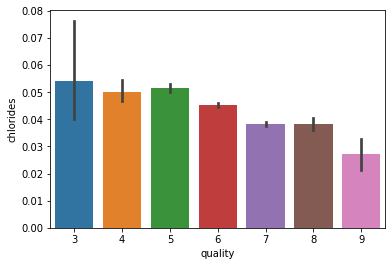

In [8]:
sns.barplot('quality', 'chlorides', data = train)
#這個很明顯隨着氯化物越少，酒的品質越好，是一個很明顯的特徵

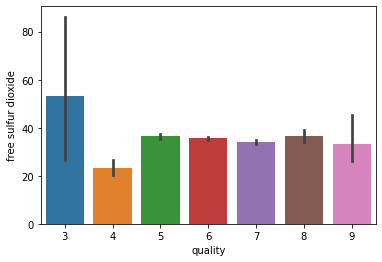

In [9]:
sns.barplot('quality', 'free sulfur dioxide', data = train)

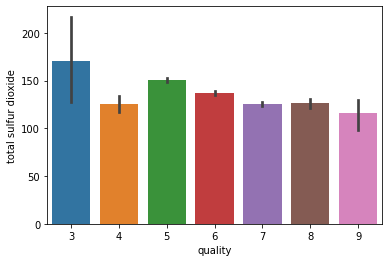

In [10]:
sns.barplot('quality', 'total sulfur dioxide', data = train)
#可是有隨着quality越好，總二氧化硫越少的感覺

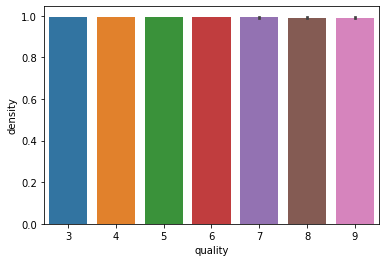

In [11]:
sns.barplot('quality', 'density', data = train)

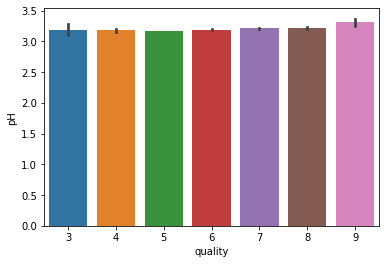

In [12]:
sns.barplot('quality', 'pH', data = train)

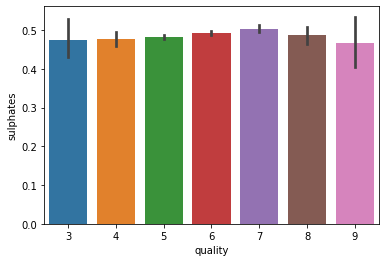

In [13]:
sns.barplot('quality', 'sulphates', data = train)

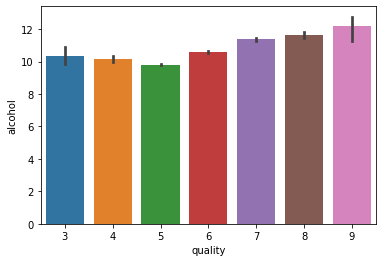

In [14]:
sns.barplot('quality', 'alcohol', data = train)
#看起來品質越好的酒，酒精濃度越高

In [15]:
train.describe()
#其實從這邊我們可以看出來這筆資料非常非常的極端，min和 max之間的差距極大，這解釋了離群值
#而酒精，ph值，和density的分布蠻均勻
#離群值極高！

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


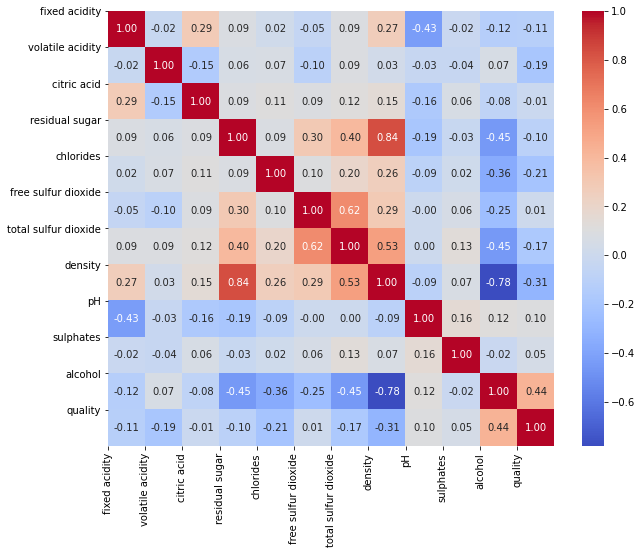

In [16]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()
#我們可以看到Citric acid, free sulfur dioxide, sulphates和quality之間最無相關性

In [17]:
train.isnull().sum()
#查有無空值

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [18]:
#分類
bins = (2, 6.5, 8)
labels = ['bad', 'good']
train['quality'] = pd.cut(train['quality'], bins = bins, labels = labels)

In [19]:
train['quality'].isnull().sum()

5

In [20]:
train = train.dropna()

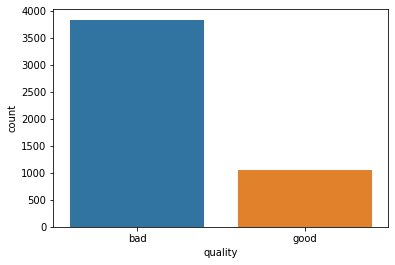

In [21]:
sns.countplot(train['quality'])

In [22]:
label_quality = LabelEncoder()
train['quality'] = label_quality.fit_transform(train['quality'])
#把bad good 變成0,1

In [23]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [24]:
train['quality'].value_counts()

0    3838
1    1055
Name: quality, dtype: int64

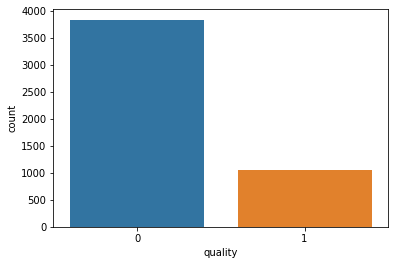

In [25]:
sns.countplot(train['quality'])

In [26]:
#分開train 和 test
x = train.drop('quality', axis = 1)
y = train['quality']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42)

In [27]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of x_train:  (3669, 11)
Shape of x_test:  (1224, 11)
Shape of y_train:  (3669,)
Shape of y_test (1224,)


In [28]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [29]:
from sklearn import metrics
from sklearn import svm

SV = svm.SVC()
SV.fit(x_train, y_train)

print("Test set accuracy: {:.6f}".format(SV.score(x_test, y_test)))

# 嘗試預測 x, y

expected = y_test
predicted = SV.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Test set accuracy: 0.817810
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       961
           1       0.67      0.30      0.41       263

    accuracy                           0.82      1224
   macro avg       0.75      0.63      0.65      1224
weighted avg       0.80      0.82      0.79      1224

[[923  38]
 [185  78]]


In [30]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

DC = DecisionTreeClassifier()
DC.fit(x_train, y_train)

print("Test set accuracy: {:.6f}".format(DC.score(x_test, y_test)))

# 嘗試預測 x, y

expected = y_test
predicted = DC.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Test set accuracy: 0.825163
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       961
           1       0.59      0.63      0.61       263

    accuracy                           0.83      1224
   macro avg       0.74      0.76      0.75      1224
weighted avg       0.83      0.83      0.83      1224

[[843 118]
 [ 96 167]]


In [31]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

RC = RandomForestClassifier()
RC.fit(x_train, y_train)

print("Test set accuracy: {:.6f}".format(RC.score(x_test, y_test)))

# 嘗試預測 x, y

expected = y_test
predicted = RC.predict(x_test)

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

Test set accuracy: 0.873366
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       961
           1       0.81      0.53      0.64       263

    accuracy                           0.87      1224
   macro avg       0.85      0.75      0.78      1224
weighted avg       0.87      0.87      0.86      1224

[[929  32]
 [123 140]]


In [32]:
# 自我交叉驗證, 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
RC = RandomForestClassifier()

RCscores = cross_val_score(RC, x_train, y_train, cv=5)
print("Cross-validation scored: {}".format(RCscores))
print("Average cross-validation score: {:.4f}".format(RCscores.mean()))

Cross-validation scored: [0.88010899 0.85831063 0.86103542 0.86648501 0.86493861]
Average cross-validation score: 0.8662


In [33]:
RC  # 檢視模型超參數

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param = {'n_estimators': [120,300,500],
         'max_depth': [1,5,8]}

grid = GridSearchCV(RandomForestClassifier(), param)
grid.fit(x_train, y_train)
grid.cv_results_['mean_test_score'], grid.best_params_, grid.best_score_

(array([0.78413745, 0.78413745, 0.78413745, 0.81766099, 0.81466334,
        0.81548004, 0.84191836, 0.84219233, 0.84464427]),
 {'max_depth': 8, 'n_estimators': 500},
 0.8446442710521131)